#I.Input Data

In [52]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

import numpy as np
import first

live, firsts, others = first.MakeFrames()

In [53]:
others.head(5)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750


In [54]:
firsts.head(5)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125


#II.Comparison of the Birth Weight of Firstborn and Non-Firstborn Children

##1.Descriptive Statistics

###a. PMF, CDF

In [55]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

Firsts 4413 4363
Others 4735 4675


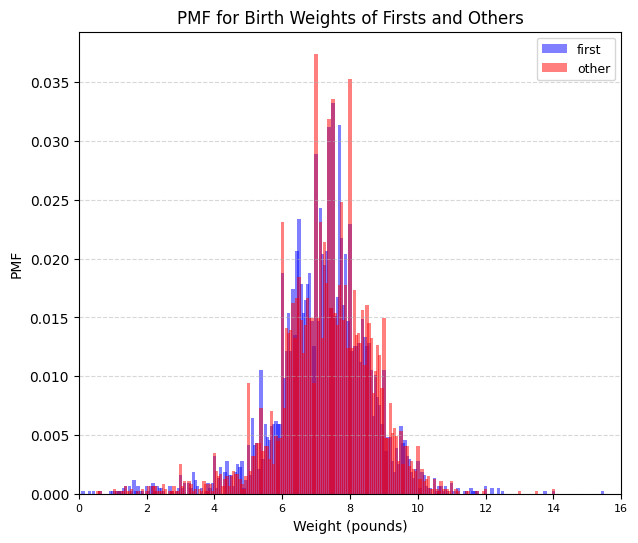

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

first_pmf = first_wgt_dropna.value_counts(normalize=True).sort_index()
other_pmf = other_wgt_dropna.value_counts(normalize=True).sort_index()


plt.figure(figsize=(7, 6))

plt.bar(first_pmf.index, first_pmf.values, width=0.1, color='blue', alpha=0.5, label='first')  # PMF firsts
plt.bar(other_pmf.index, other_pmf.values, width=0.1, color='red', alpha=0.5, label='other')  # PMF others

plt.xlabel('Weight (pounds)', fontsize=10)
plt.ylabel('PMF', fontsize=10)
plt.title('PMF for Birth Weights of Firsts and Others', fontsize=12)

plt.xlim(0, 16)
plt.xticks(np.arange(0, 17, 2), fontsize=8, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)  #grid
plt.legend(fontsize=9)
plt.show()


Comment on the Chart:

These distributions all resemble a "bell shape," with many values clustering around the mean and fewer extreme values.

There are multiple sharp peaks and dips, along with some noticeable differences between the distributions.

➡️ It’s hard to determine which of these features are meaningful.

➡️ It’s also difficult to discern overall characteristics; for example, which distribution do you think has the higher mean?

➡️ Use the CDF for better insight.

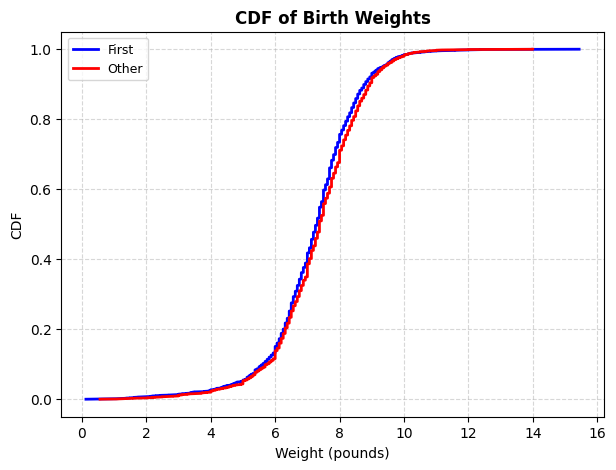

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

first_x, first_cdf = compute_cdf(first_wgt_dropna)
other_x, other_cdf = compute_cdf(other_wgt_dropna)


plt.figure(figsize=(7, 5))

plt.plot(first_x, first_cdf, label='First', color='blue', linewidth=2)
plt.plot(other_x, other_cdf, label='Other', color='red', linewidth=2)

plt.xlabel('Weight (pounds)', fontsize=10)
plt.ylabel('CDF', fontsize=10)
plt.title('CDF of Birth Weights', fontsize=12, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.legend(fontsize=9)
plt.show()


Comment on the Chart:

Since the line for firstborn children is to the left of the line for later-born children, firstborns tend to be slightly lighter.

The noticeable gap in the middle suggests that the difference is more pronounced above the mean value.

###b.Statistical measures


In [58]:
print('mean_first: ',first_wgt_dropna.mean())
print('median_first: ',first_wgt_dropna.median())
print('mean_other: ',other_wgt_dropna.mean())
print('median_other: ',other_wgt_dropna.median())

mean_first:  7.201094430437772
median_first:  7.3125
mean_other:  7.325855614973262
median_other:  7.375


Comment:

The mean and median birth weights of firstborn children are lower compared to those of later-born children.

###c.Cohen's Effect Size

In [59]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.

    group1: Series or DataFrame
    group2: Series or DataFrame

    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [60]:
CohenEffectSize(first_wgt_dropna,other_wgt_dropna)
#Nhỏ: d = 0.2
#Trung bình: d = 0.5
#Lớn: d = 0.8#

np.float64(-0.08867236333202932)

Comment:

Firstborn children are lighter than later-born children, but the difference is small.

## 2.Inference Statistic

###a.Hypothesis Testing

It can be observed that the average birth weight of the newborns is slightly lower. Now, we will examine whether this effect is statistically significant.

In [61]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


In [62]:
data = firsts.totalwgt_lb.values, others.totalwgt_lb.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

###b. Regression

It has been observed that first-born children tend to weigh less than their later-born siblings, and this effect is statistically significant. However, this result is somewhat surprising, as there is no obvious biological mechanism that would necessarily cause first-borns to be lighter. This raises the question of whether the observed relationship might be spurious.

- Input:

    + Independent variable: isfirst (a dummy variable indicating whether the child is first-born)

    + Dependent variable (target for prediction): totalwgt_lb (birth weight in pounds)

    + This model compares the average birth weight of first-born children with that of non-first-born children.



- Findings:

    + Coefficient of isfirst[T.True] (-0.1248): First-born children (isfirst=True) weigh on average 0.1248 pounds less than non-first-born children.

    + R-squared (0.002): The model explains about 0.2% of the variation in birth weight based on whether the child is first-born.→ Being first-born is just one of many factors that influence birth weight; many other important variables are not captured in this model.

    + P-value for isfirst[T.True] (0.000):The result is highly statistically significant, suggesting that the difference in weight between first-born and non-first-born children is unlikely to be due to random chance and may be driven by an underlying factor.



- Conclusion:
    + There is a measurable difference in birth weight between first-born and later-born children (first-borns tend to weigh less). However, the variable isfirst accounts for only a very small portion of the variation in birth weight. This implies that while the effect exists, its practical impact is minimal, and many other factors contribute to birth weight that are not included in the model.

In [63]:
import statsmodels.formula.api as smf
live, firsts, others = first.MakeFrames()

live['isfirst'] = live.birthord == 1
results = smf.ols('totalwgt_lb ~ isfirst', data=live).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.55e-05
Time:                        08:38:34   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    3

### c.Confidence Interval

In [64]:
from scipy import stats
n     = first_wgt_dropna.shape[0]
mean  = first_wgt_dropna.mean()
sdt   = first_wgt_dropna.std()
gamma = 0.95
alpha = 1-gamma

dist = stats.t(n-1)
c = stats.t(n-1).ppf(alpha/2)
e = -c * sdt / np.sqrt(n)

lower = mean - e
upper = mean + e


print(f'There is a {gamma:.0%} chance that the average birth weight of firstborn children falls within the range of {lower:.3f} to {upper:.3f}')
print(f'There is a {gamma:.0%} chance that the average birth weight of firstborn children falls within {mean:.3f} ± {e:.3f}')

There is a 95% chance that the average birth weight of firstborn children falls within the range of 7.159 to 7.243
There is a 95% chance that the average birth weight of firstborn children falls within 7.201 ± 0.042


# II. Comparison of Pregnancy Duration Between First and Subsequent Births (Using PMF)

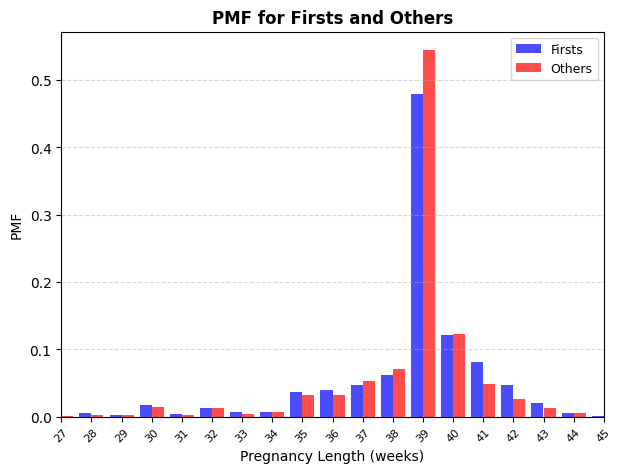

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

first_pmf = firsts.prglngth.value_counts(normalize=True).sort_index()
other_pmf = others.prglngth.value_counts(normalize=True).sort_index()


plt.figure(figsize=(7, 5))

plt.bar(first_pmf.index - 0.2, first_pmf.values, width=0.4, color='blue', alpha=0.7, label='Firsts') # Vẽ PMF của firsts
plt.bar(other_pmf.index + 0.2, other_pmf.values, width=0.4, color='red', alpha=0.7, label='Others') # Vẽ PMF của others


plt.xlabel('Pregnancy Length (weeks)', fontsize=10)
plt.ylabel('PMF', fontsize=10)
plt.title('PMF for Firsts and Others', fontsize=12, fontweight='bold')

plt.xlim(27, 45)
plt.xticks(np.arange(27, 46, 1), fontsize=8, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=9)
plt.show()


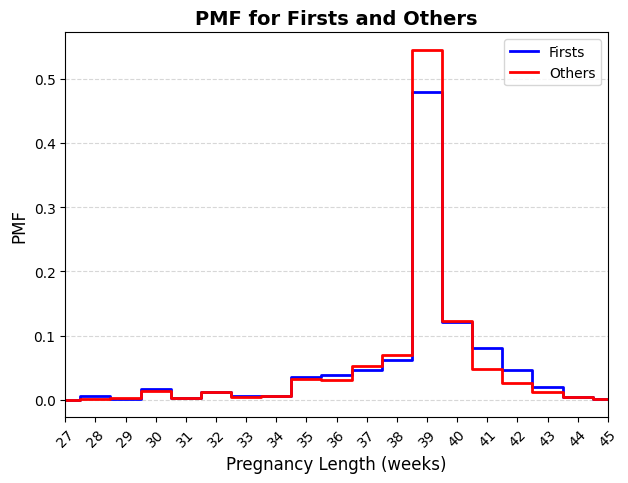

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

first_pmf = firsts.prglngth.value_counts(normalize=True).sort_index()
other_pmf = others.prglngth.value_counts(normalize=True).sort_index()

plt.figure(figsize=(7, 5))

plt.step(first_pmf.index, first_pmf.values, where='mid', color='blue', linewidth=2, label='Firsts') # Vẽ histogram dạng "step" (chỉ có đường viền)
plt.step(other_pmf.index, other_pmf.values, where='mid', color='red', linewidth=2, label='Others')


plt.xlabel('Pregnancy Length (weeks)', fontsize=12)
plt.ylabel('PMF', fontsize=12)
plt.title('PMF for Firsts and Others', fontsize=14, fontweight='bold')


plt.xlim(27, 45)
plt.xticks(np.arange(27, 46, 1), fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.show()


Comment on the Chart:

The probability mass function (PMF) of firstborn children (blue) tends to be more right-skewed compared to the PMF of later-born children (red).


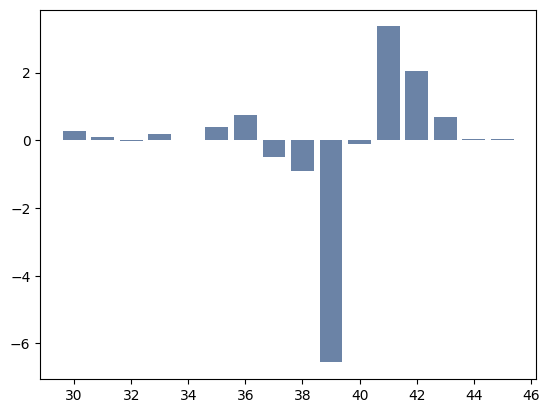

In [67]:
weeks = range(30, 46)
diffs = []

for week in weeks:
    p1 = first_pmf.get(week, 0)
    p2 = other_pmf.get(week, 0)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)


Explanation
 + X-axis: Represents the number of pregnancy weeks, ranging from 30 to 46 weeks.

 + Y-axis: Represents the probability difference (measured in percentage points) between first pregnancies and subsequent pregnancies.

 + Positive values: Indicate that the probability is higher for first pregnancies.

 + Negative values: Indicate that the probability is higher for subsequent pregnancies.



Observations :

+ From 30 to 37 weeks: The probability difference is relatively small, fluctuating around zero, indicating that the likelihood of first and subsequent pregnancies occurring within this range is nearly the same.

+ At 38 weeks: The difference is negative and at its largest, showing that subsequent pregnancies are significantly more likely to occur at this week compared to first pregnancies.

+ At 39 and 40 weeks: The difference remains negative but is smaller than at 38 weeks.

+ From 41 to 43 weeks: The difference is positive, indicating that first pregnancies are more likely to extend into this range than subsequent pregnancies.

+ From 44 to 46 weeks: The difference is close to zero, suggesting that the probability of first and subsequent pregnancies occurring in this period is nearly equal.

=> The chart reveals a clear distinction in pregnancy duration between first and subsequent pregnancies.

=> First pregnancies tend to last longer (notably between 41-43 weeks), whereas subsequent pregnancies tend to conclude earlier (especially at 38 weeks).

=> The greatest probability difference between first and subsequent pregnancies occurs at week 38.